In [1]:
import json
import os


# Configure warning behavior
import warnings
warnings.filterwarnings("ignore")

# Import matplotlib and use `%matplotlib` magic command
%matplotlib inline
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
import seaborn as sns

import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 5000)

In [2]:
CREATE_TREE = "totalTreeCreationTime"
SKYLINE = "totalSkylineTime"
TOPK = "totalTopKTime"
SKY_TOPK_S1 = "totalSkyTopKTime_Sol1"
SKY_TOPK_S2 = "totalSkyTopKTime_Sol2"

N_DIMS = "nDims"
N_PARTS = "nPartitions"

DATA_SIZE = "dataSize"
DISTRO = "distribution"
IOs = "totalTreeCreationIOs"
OVERFLOW = "totalNOverflow"

UNIFORM = "uniform"
NORMAL = "normal"
CORR = "correlated"
ANTICORR = "anticorrelated"
DISTRIBUTIONS = [UNIFORM, NORMAL, CORR, ANTICORR]
DATASIZE = [5000, 50000, 100000]
PARTITIONS = [2, 3, 4, 5, 6, 8]
DIMENSIONS = [2, 3, 4, 5]

In [3]:
def create_results_dict():
    root_dir = os.path.join("C:\\Users\\karal\\progr\\Scala\\BigDataSpark\\RStarTreeScala\\Results")
    json_dict = {}

    for root, dirs, files in os.walk(root_dir):
        for file in files:
            if file.endswith(".json"):
                file_path = os.path.join(root, file)
                with open(file_path, 'r') as json_file:
                    try:
                        json_data = json.load(json_file)
                        key = file_path[file_path.find("iter"):]
                        iteration = key[4:key.find("\\")]
                        json_data["iter"] = iteration
                        json_dict[key] = json_data
                    except json.JSONDecodeError as e:
                        print(f"Error decoding JSON in file {file_path}: {e}")

    return json_dict

In [4]:
results = create_results_dict()

In [5]:
results

{'n': {'distribution': 'uniform_100k_3D',
  'dataSize': 100000,
  'nDims': 3,
  'nPartitions': 4,
  'totalTreeCreationTime': 88.4862448,
  'totalTreeCreationIOs': 580276,
  'totalNOverflow': 1143,
  'totalSkylineTime': 7.6412645,
  'aggrSkylineTime': 0.0305427,
  'kForDataset': 10,
  'totalTopKTime': 11.6397159,
  'aggrTopKTime': 0.6114969,
  'kForSkyline': 10,
  'totalSkyTopKTime_Sol1': 10.9466496,
  'aggrSkyTopKTime': 0.3997643,
  'totalSkyTopKTime_Sol2': 1.6148144,
  'iter': ''},
 'iter1\\100k\\anticorrelated_100k\\anticorrelated_100k_2D_N100000_D2_P2_Dk10_Sk10.json': {'distribution': 'anticorrelated_100k_2D',
  'dataSize': 100000,
  'nDims': 2,
  'nPartitions': 2,
  'totalTreeCreationTime': 131.2114089,
  'totalTreeCreationIOs': 624321,
  'totalNOverflow': 853,
  'totalSkylineTime': 5.4493899,
  'aggrSkylineTime': 0.025822,
  'kForDataset': 10,
  'totalTopKTime': 10.2876152,
  'aggrTopKTime': 0.1840206,
  'kForSkyline': 10,
  'totalSkyTopKTime_Sol1': 7.8865529,
  'aggrSkyTopKTime':

In [6]:
df3 = []
for experiment_file, experiment_results in results.items():
    df3.append({ **{"file" : experiment_file} ,
                 **experiment_results })
df3 = pd.DataFrame(df3)
df3.drop(['file'], axis=1, inplace=True)
df3

distribution  dataSize  nDims  nPartitions  totalTreeCreationTime  totalTreeCreationIOs  totalNOverflow  totalSkylineTime  aggrSkylineTime  kForDataset  totalTopKTime  aggrTopKTime  kForSkyline  totalSkyTopKTime_Sol1  aggrSkyTopKTime  totalSkyTopKTime_Sol2 iter
0           uniform_100k_3D    100000      3            4              88.486245                580276            1143          7.641265         0.030543           10      11.639716      0.611497           10              10.946650         0.399764               1.614814     
1    anticorrelated_100k_2D    100000      2            2             131.211409                624321             853          5.449390         0.025822           10      10.287615      0.184021           10               7.886553         0.130385               0.623092    1
2    anticorrelated_100k_2D    100000      2            3              62.441994                523763             870          4.825142         0.037424           10       5.383503      0.221051           10               6.609000         0.111318               0.423170    1
3    anticorrelated_100k_2D    100000      2            4              37.178695                484484             842          5.914430         0.022796           10       6.244975      0.287150           10               6.820192         0.102375               0.318388    1
4    anticorrelated_100k_2D    100000      2            6              29.753165                501816             893          3.880024         0.033871           10       3.728805      0.429932           10               4.707157         0.097781               0.306671    1
5    anticorrelated_100k_2D    100000      2            8              14.359381                504646             907          1.716369         0.059361           10       2.507535      0.590278           10               2.949413         0.116713               0.308751    1
6    anticorrelated_100k_3D    100000      3            2             152.415498                833607            1474         13.775488         0.609421           10      21.714786      0.243191           10              30.277277         0.224740               7.516275    1
7    anticorrelated_100k_3D    100000      3            3              54.469439                762094            1465          2.900476         0.599837           10       7.405951      0.351140           10              10.728254         0.257795               5.145417    1
8    anticorrelated_100k_3D    100000      3            4              37.171552                715624            1503          5.517537         0.897213           10       9.219961      0.418474           10              11.741321         0.292694               4.648623    1
9    anticorrelated_100k_3D    100000      3            6              22.496690                552578            1431          6.011074         1.398394           10       6.290435      0.602326           10               8.111358         0.357484               3.880391    1
10   anticorrelated_100k_3D    100000      3            8              26.695732                537787            1394          4.154009         1.728703           10       4.508120      0.655258           10               6.169764         0.367891               3.998759    1
11   anticorrelated_100k_4D    100000      4            2             172.701259                744624            1474         12.596513         4.053153           10      19.550571      0.334317           10              41.111579         0.309358              62.092210    1
12   anticorrelated_100k_4D    100000      4            3              72.694552                733773            1580         13.484307         5.104114           10      16.563784      0.455834           10              26.772100         0.429805              49.692185    1
13   anticorrelated_100k_4D    100000      4            4              32.817270                663879            1369          9.228639 

In [7]:
df3.sort_values(by = [DATA_SIZE, DISTRO, N_DIMS, N_PARTS, "iter"], inplace=True)
df3

distribution  dataSize  nDims  nPartitions  totalTreeCreationTime  totalTreeCreationIOs  totalNOverflow  totalSkylineTime  aggrSkylineTime  kForDataset  totalTopKTime  aggrTopKTime  kForSkyline  totalSkyTopKTime_Sol1  aggrSkyTopKTime  totalSkyTopKTime_Sol2 iter
161    anticorrelated_5k_2D      5000      2            2               1.554420                 23821              43          0.253342         0.005568           10       0.292088      0.076524           10               0.326788         0.026067               0.041529    1
400    anticorrelated_5k_2D      5000      2            2               1.539008                 23821              43          0.270903         0.006994           10       0.368285      0.119292           10               0.332888         0.023478               0.041584    2
640    anticorrelated_5k_2D      5000      2            2               1.540591                 23821              43          0.291038         0.039990           10       0.278531      0.058590           10               0.336989         0.028603               0.044294    3
162    anticorrelated_5k_2D      5000      2            3               1.199289                 24483              45          0.249499         0.033187           10       0.243740      0.059046           10               0.275944         0.039206               0.037767    1
401    anticorrelated_5k_2D      5000      2            3               1.184129                 24483              45          0.292744         0.017437           10       0.397110      0.083636           10               0.330947         0.026382               0.042635    2
641    anticorrelated_5k_2D      5000      2            3               1.190293                 24483              45          0.254322         0.012944           10       0.273686      0.064303           10               0.292547         0.029248               0.046351    3
163    anticorrelated_5k_2D      5000      2            4               0.733492                 16964              26          0.166182         0.045224           10       0.126077      0.057499           10               0.168383         0.027436               0.039268    1
402    anticorrelated_5k_2D      5000      2            4               0.760187                 16964              26          0.159751         0.041234           10       0.147074      0.079634           10               0.156717         0.030583               0.034256    2
642    anticorrelated_5k_2D      5000      2            4               0.760461                 16964              26          0.181754         0.052691           10       0.162451      0.082850           10               0.175086         0.028027               0.037588    3
164    anticorrelated_5k_2D      5000      2            6               0.700287                 13092              20          0.188871         0.037673           10       0.133912      0.078842           10               0.153637         0.029250               0.037766    1
403    anticorrelated_5k_2D      5000      2            6               0.661227                 13092              20          0.214397         0.050403           10       0.162065      0.070662           10               0.183802         0.031177               0.042853    2
643    anticorrelated_5k_2D      5000      2            6               0.706259                 13092              20          0.268833         0.058757           10       0.215421      0.096273           10               0.225702         0.040366               0.036456    3
165    anticorrelated_5k_2D      5000      2            8               0.455777                  8464               8          0.075431         0.026250           10       0.201571      0.159611           10               0.084337         0.031665               0.040468    1
404    anticorrelated_5k_2D      5000      2            8               0.459346                  8464               8          0.118787 

In [8]:
df = df3.groupby(['distribution', 'dataSize', 'nDims', 'nPartitions', 'kForDataset'])

df = df.agg({
    'totalTreeCreationTime': 'mean',
    'totalTreeCreationIOs': 'mean',
    'totalNOverflow': 'mean',
    'totalSkylineTime': 'mean',
    'aggrSkylineTime': 'mean',
    'totalTopKTime': 'mean',
    'aggrTopKTime': 'mean',
    'totalSkyTopKTime_Sol1': 'mean',
    'aggrSkyTopKTime': 'mean',
    'totalSkyTopKTime_Sol2': 'mean',
})

df = df.reset_index()
df.sort_values(by = [DATA_SIZE, DISTRO, N_DIMS, N_PARTS], inplace=True)
df['distribution'] = df['distribution'].str.extract(r'(\w+)_\d+k_\d+D')
df['distribution'] = pd.Categorical(df['distribution'], categories=DISTRIBUTIONS, ordered=True)
df

distribution  dataSize  nDims  nPartitions  kForDataset  totalTreeCreationTime  totalTreeCreationIOs  totalNOverflow  totalSkylineTime  aggrSkylineTime  totalTopKTime  aggrTopKTime  totalSkyTopKTime_Sol1  aggrSkyTopKTime  totalSkyTopKTime_Sol2
40   anticorrelated      5000      2            2           10               1.544673               23821.0            43.0          0.271761         0.017518       0.312968      0.084802               0.332221         0.026049               0.042469
41   anticorrelated      5000      2            3           10               1.191237               24483.0            45.0          0.265522         0.021189       0.304845      0.068995               0.299813         0.031612               0.042251
42   anticorrelated      5000      2            4           10               0.751380               16964.0            26.0          0.169229         0.046383       0.145201      0.073328               0.166729         0.028682               0.037037
43   anticorrelated      5000      2            6           10               0.689258               13092.0            20.0          0.224034         0.048945       0.170466      0.081926               0.187714         0.033598               0.039025
44   anticorrelated      5000      2            8           10               0.475771                8464.0             8.0          0.099632         0.033707       0.169051      0.120541               0.113455         0.030024               0.039544
45   anticorrelated      5000      3            2           10               1.348419               22345.0            55.0          0.156660         0.100995       0.153519      0.080649               0.185345         0.030136               0.249043
46   anticorrelated      5000      3            3           10               1.001681               20433.0            48.0          0.370834         0.251377       0.165585      0.091855               0.192790         0.035352               0.213139
47   anticorrelated      5000      3            4           10               0.915445               21710.0            60.0          0.372996         0.257517       0.161769      0.084986               0.161323         0.038210               0.190290
48   anticorrelated      5000      3            6           10               0.689537               16290.0            36.0          0.490964         0.327517       0.173880      0.098132               0.188769         0.046820               0.185276
49   anticorrelated      5000      3            8           10               0.694501               17248.0            50.0          0.647895         0.489595       0.201397      0.114594               0.195667         0.051161               0.186467
50   anticorrelated      5000      4            2           10               1.440384               22251.0            69.0          0.668367         0.584329       0.249629      0.100719               0.244090         0.036670               1.073270
51   anticorrelated      5000      4            3           10               1.039972               20334.0            58.0          0.871715         0.738561       0.186638      0.107351               0.196720         0.041950               0.821186
52   anticorrelated      5000      4            4           10               0.934627               20091.0            61.0          1.078441         0.910574       0.181737      0.090139               0.217511         0.046650               0.698080
53   anticorrelated      5000      4            6           10               0.682541               15426.0            34.0          1.300444         1.172954       0.154013      0.112998               0.185092         0.070010               0.665098
54   anticorrelated      5000      4            8           10               0.669154               15564.0            44.0          1.238357         1.116913       0.162148      0.132221               0.174491         0.068412               

In [9]:
def getDatasetResults(distribution, datasize): 
    datasetResults = df[(df[DISTRO] == distribution) & (df[DATA_SIZE] == datasize)]
    return datasetResults

In [10]:

def make_plots_dont_sharex(timer_):
    # Create a grid of subplots
    fig, axs = plt.subplots(len(DATASIZE), len(DISTRIBUTIONS), figsize=(15, 10), sharex=True)

    # Iterate over all combinations of datasize and distribution
    for i, datasize in enumerate(DATASIZE):
        for j, distribution in enumerate(DISTRIBUTIONS):
            results_group_ = getDatasetResults(distribution, datasize)
            df_ = results_group_[[N_DIMS, N_PARTS, timer_]]

            # df = df[df['nDims'].isin([2])]

            # Plotting in the corresponding subplot
            for key, group in df_.groupby(N_DIMS):
                axs[i, j].plot(group[N_PARTS], group[timer_], marker='o', label=f'nDims = {key}')

            axs[i, j].set_xlabel('Number of Partitions')
            axs[i, j].set_ylabel(timer_)
            axs[i, j].set_title(f'Datasize: {datasize}, Distribution: {distribution}')
            axs[i, j].legend(title='Number of Dimensions')

    # Adjust layout to prevent clipping of titles
    plt.tight_layout()

    # Show the plot
    plt.show()


def make_plots_sharex(timer_):
    # Create a grid of subplots
    fig, axs = plt.subplots(len(DATASIZE), len(DISTRIBUTIONS), figsize=(15, 10), sharex=True)

    # Iterate over all combinations of datasize and distribution
    for i, datasize in enumerate(DATASIZE):
        # Use sharey=True for the first subplot in each row, and False for the rest
        sharey_flag = True
        for j, distribution in enumerate(DISTRIBUTIONS):
            results_group_ = getDatasetResults(distribution, datasize)
            df_ = results_group_[[N_DIMS, N_PARTS, timer_]]

            # df = df[df['nDims'].isin([2])]

            # Plotting in the corresponding subplot
            for key, group in df_.groupby(N_DIMS):
                axs[i, j].plot(group[N_PARTS], group[timer_], marker='o', label=f'nDims = {key}')

            axs[i, j].set_xlabel('Number of Partitions')
            axs[i, j].set_ylabel(timer_)
            axs[i, j].set_title(f'Datasize: {datasize}, Distribution: {distribution}')
            axs[i, j].legend(title='Number of Dimensions')

            # Share y-axis only for the first subplot in each row
            axs[i, j].get_shared_y_axes().join(axs[i, 0])
            axs[i, j].sharey(axs[i, 0])

            # Set sharey_flag to False after the first subplot in each row
            sharey_flag = False

    # Adjust layout to prevent clipping of titles
    plt.tight_layout()

    # Show the plot
    plt.show()
    
def make_plots(timer_, sharex):
    if sharex:
        make_plots_sharex(timer_)
    else:
        make_plots_dont_sharex(timer_)

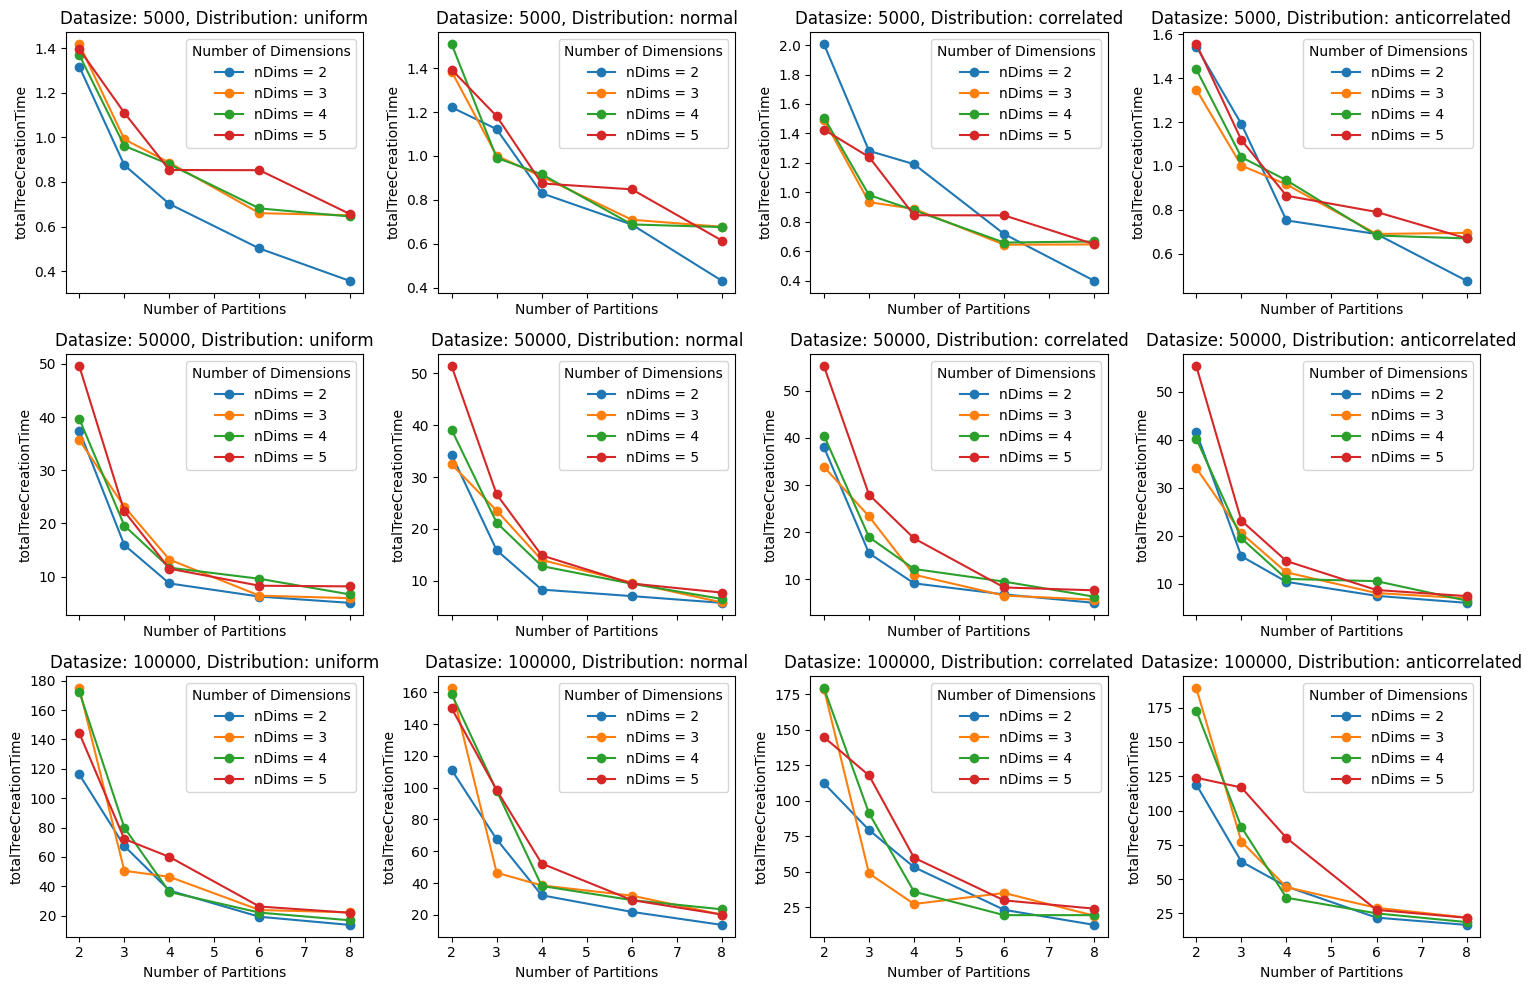

In [11]:
make_plots(CREATE_TREE, False)

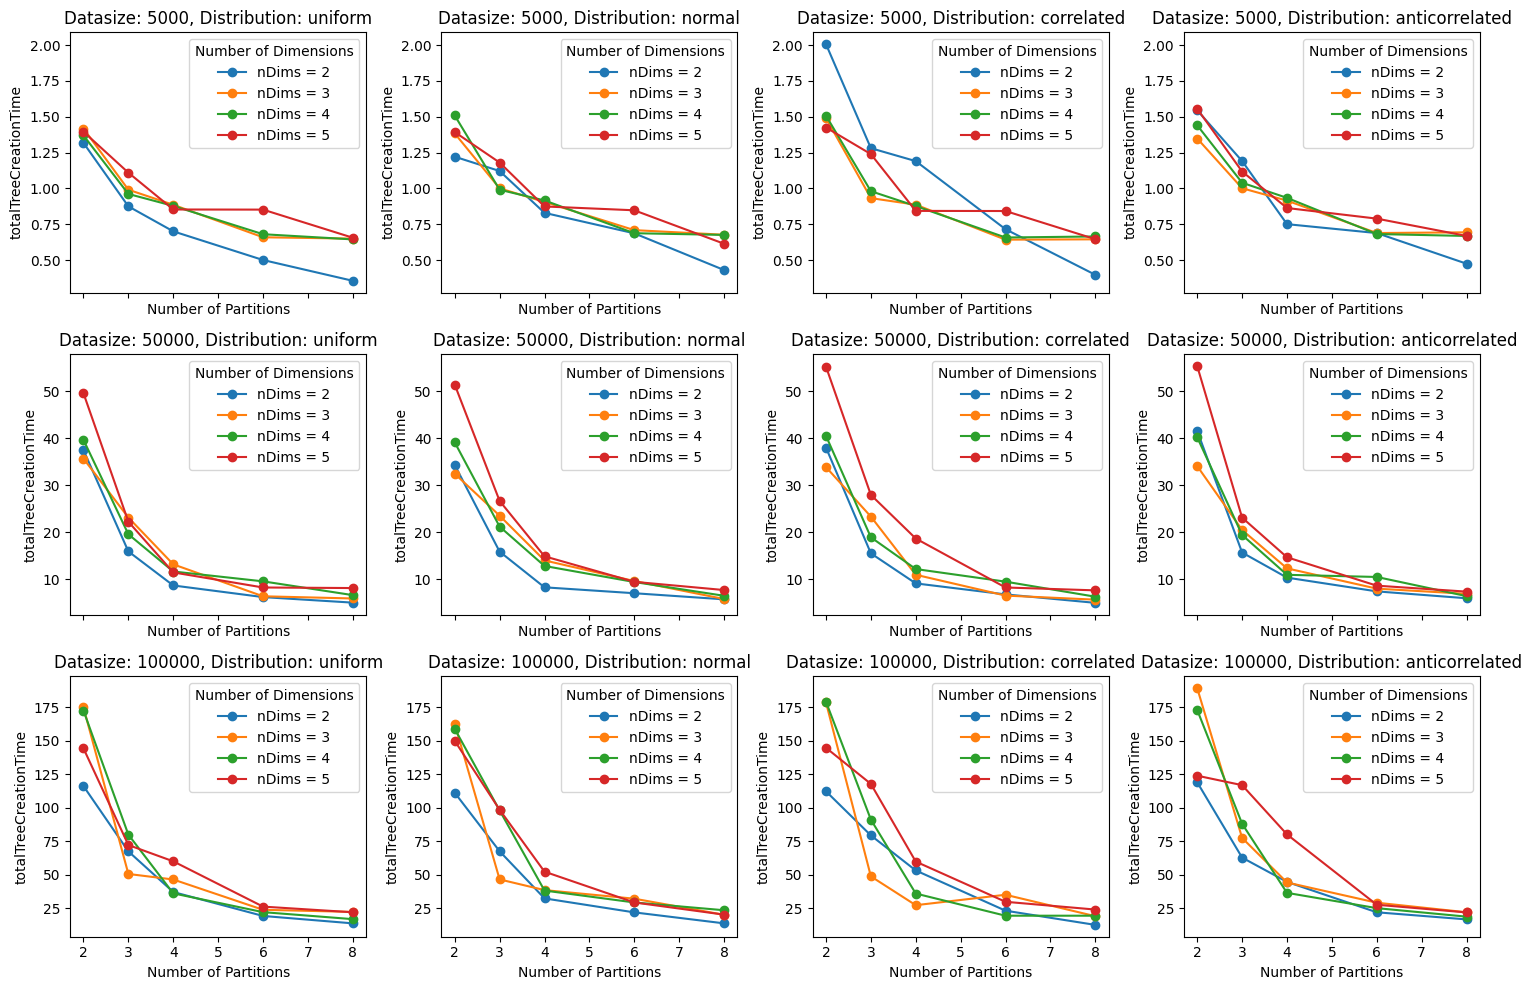

In [12]:
make_plots(CREATE_TREE, True)

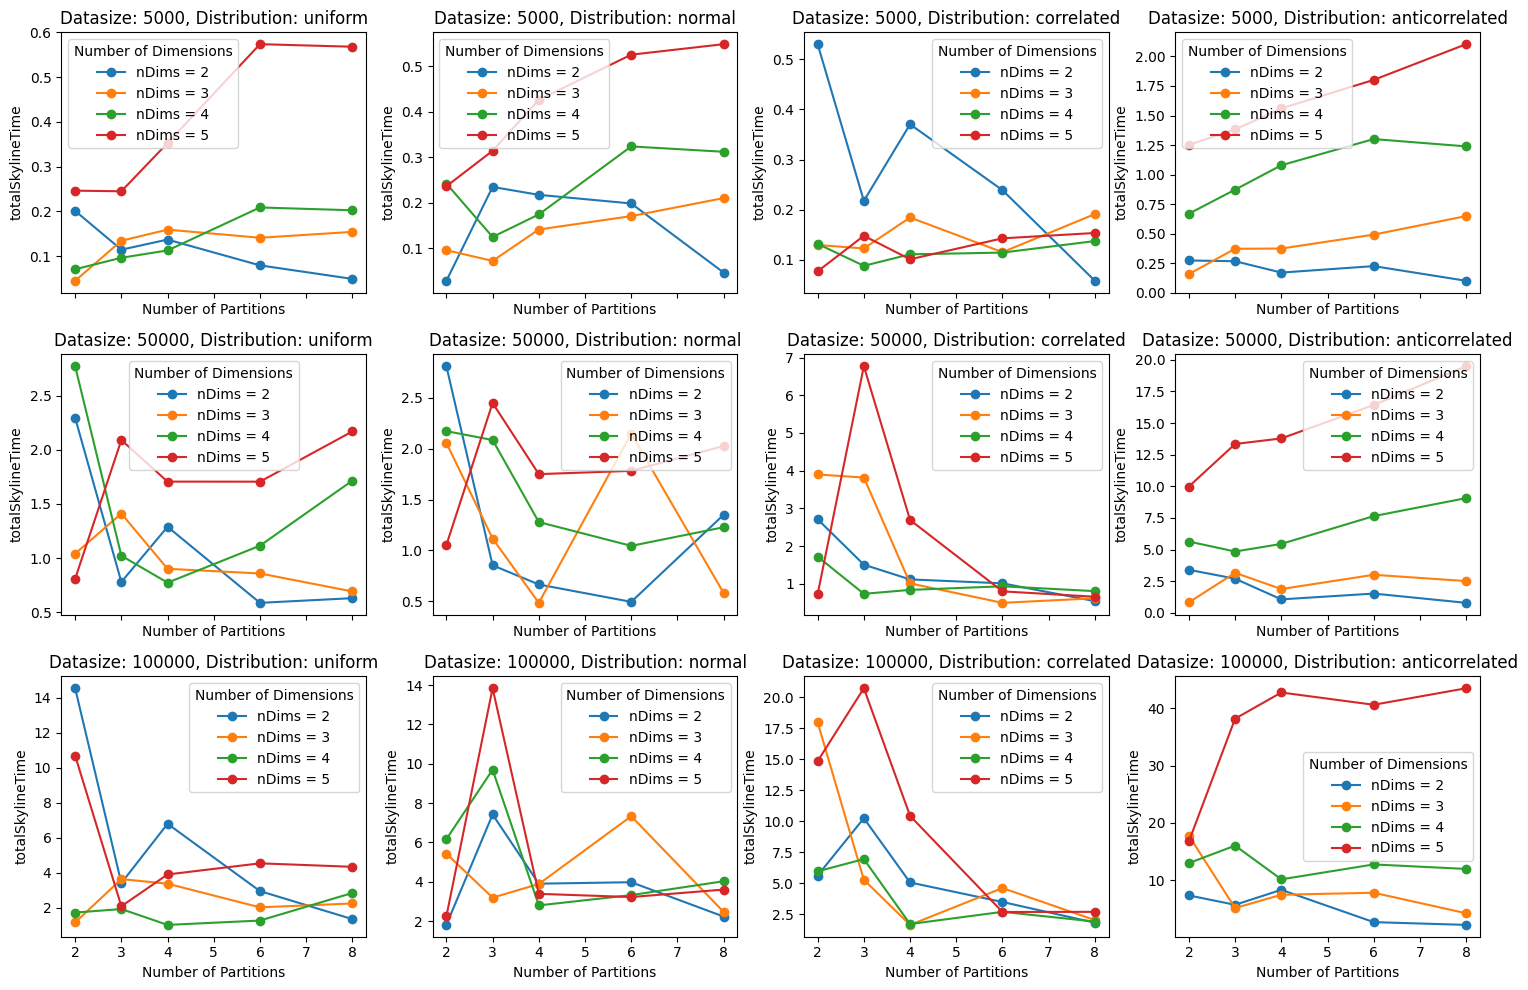

In [13]:
make_plots(SKYLINE, False)

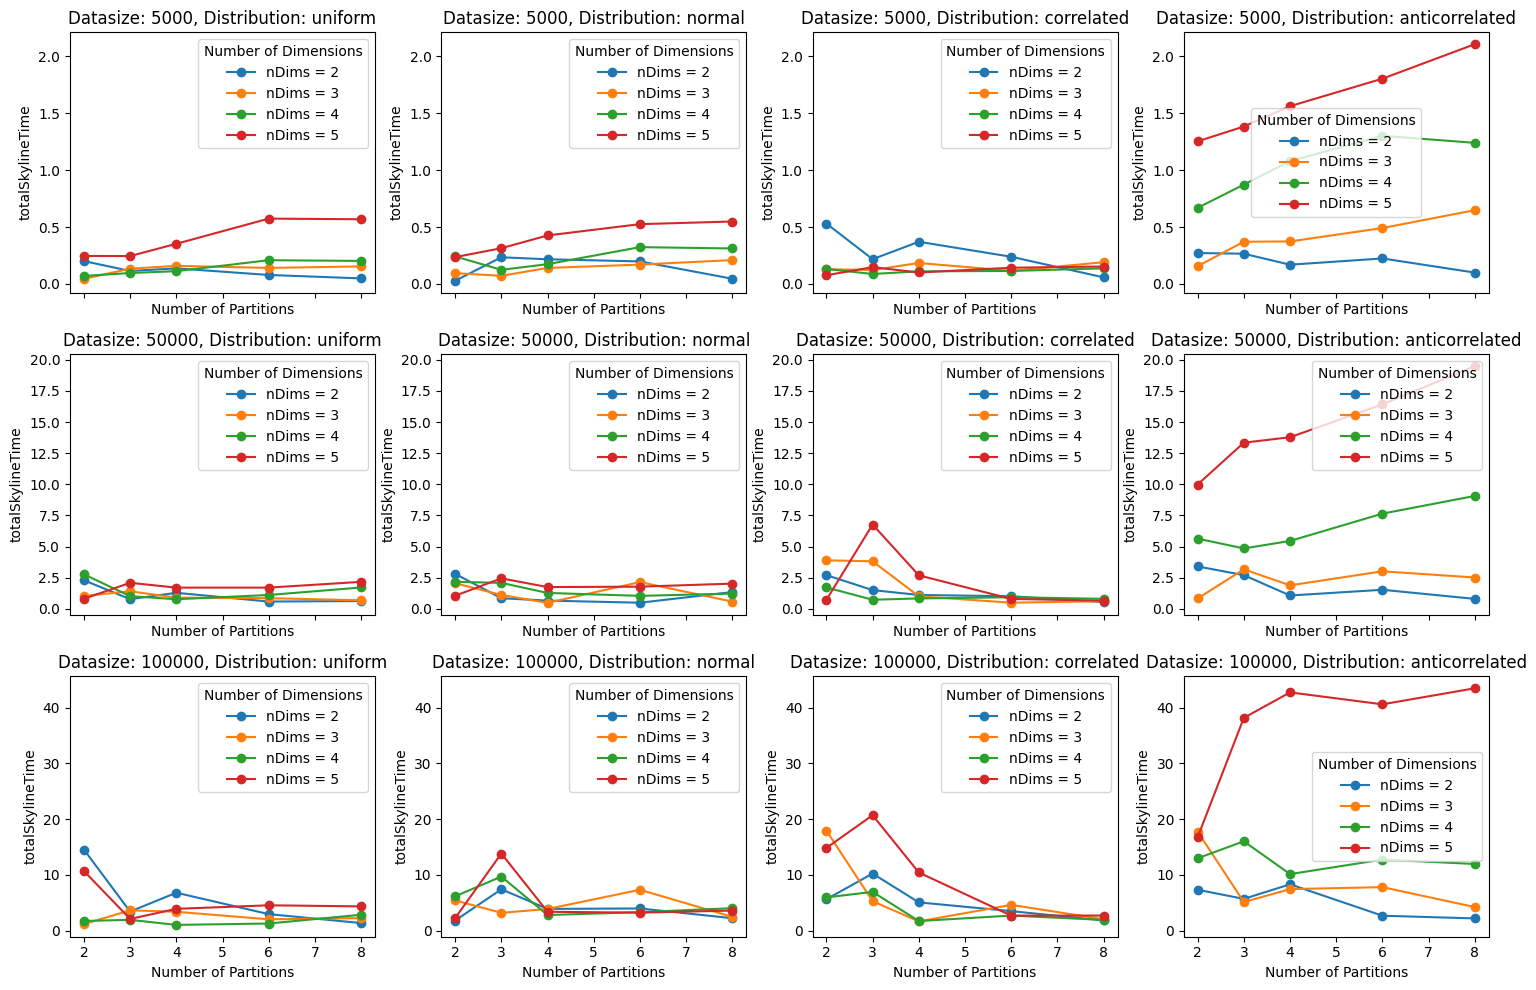

In [14]:
make_plots(SKYLINE, True)

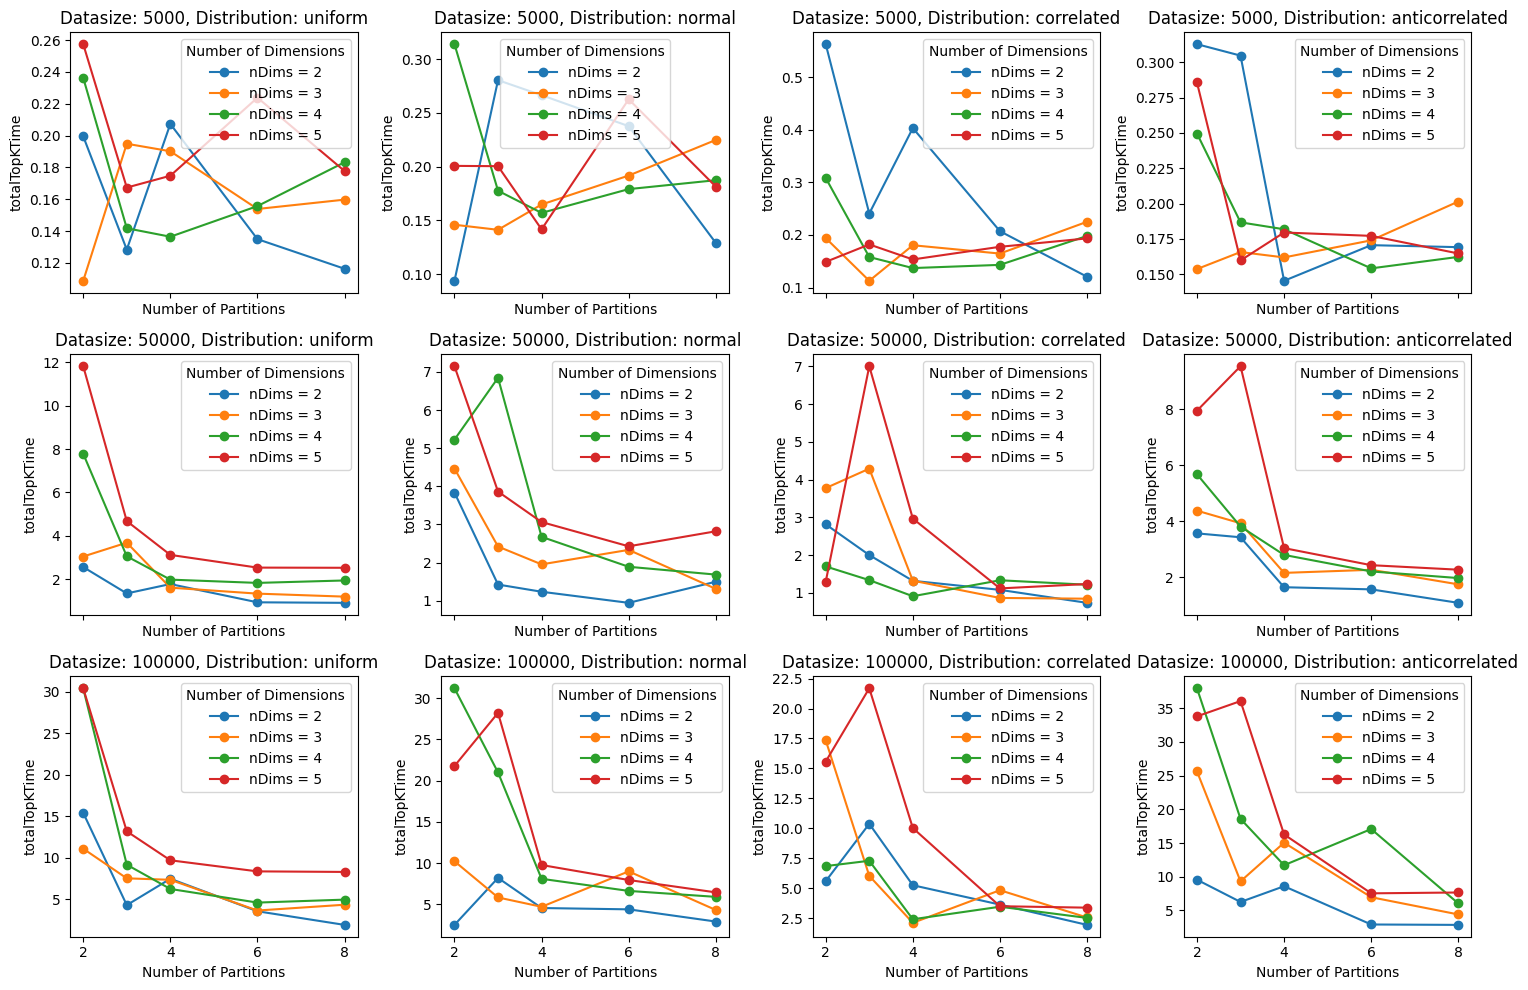

In [15]:
make_plots(TOPK, False)

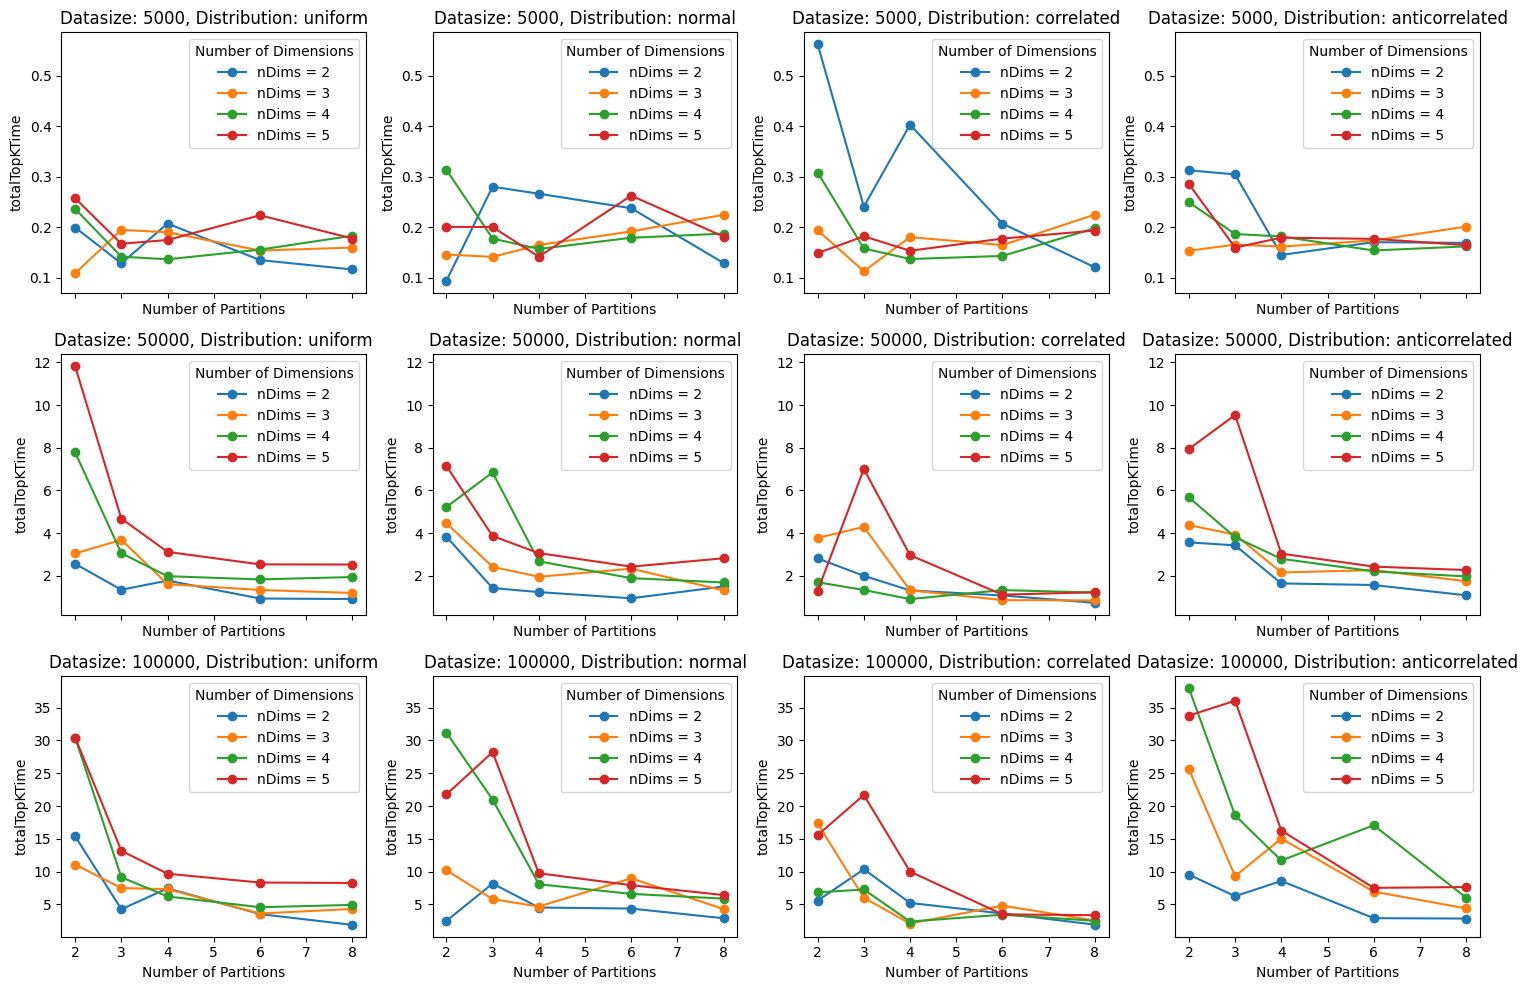

In [16]:
make_plots(TOPK, True)

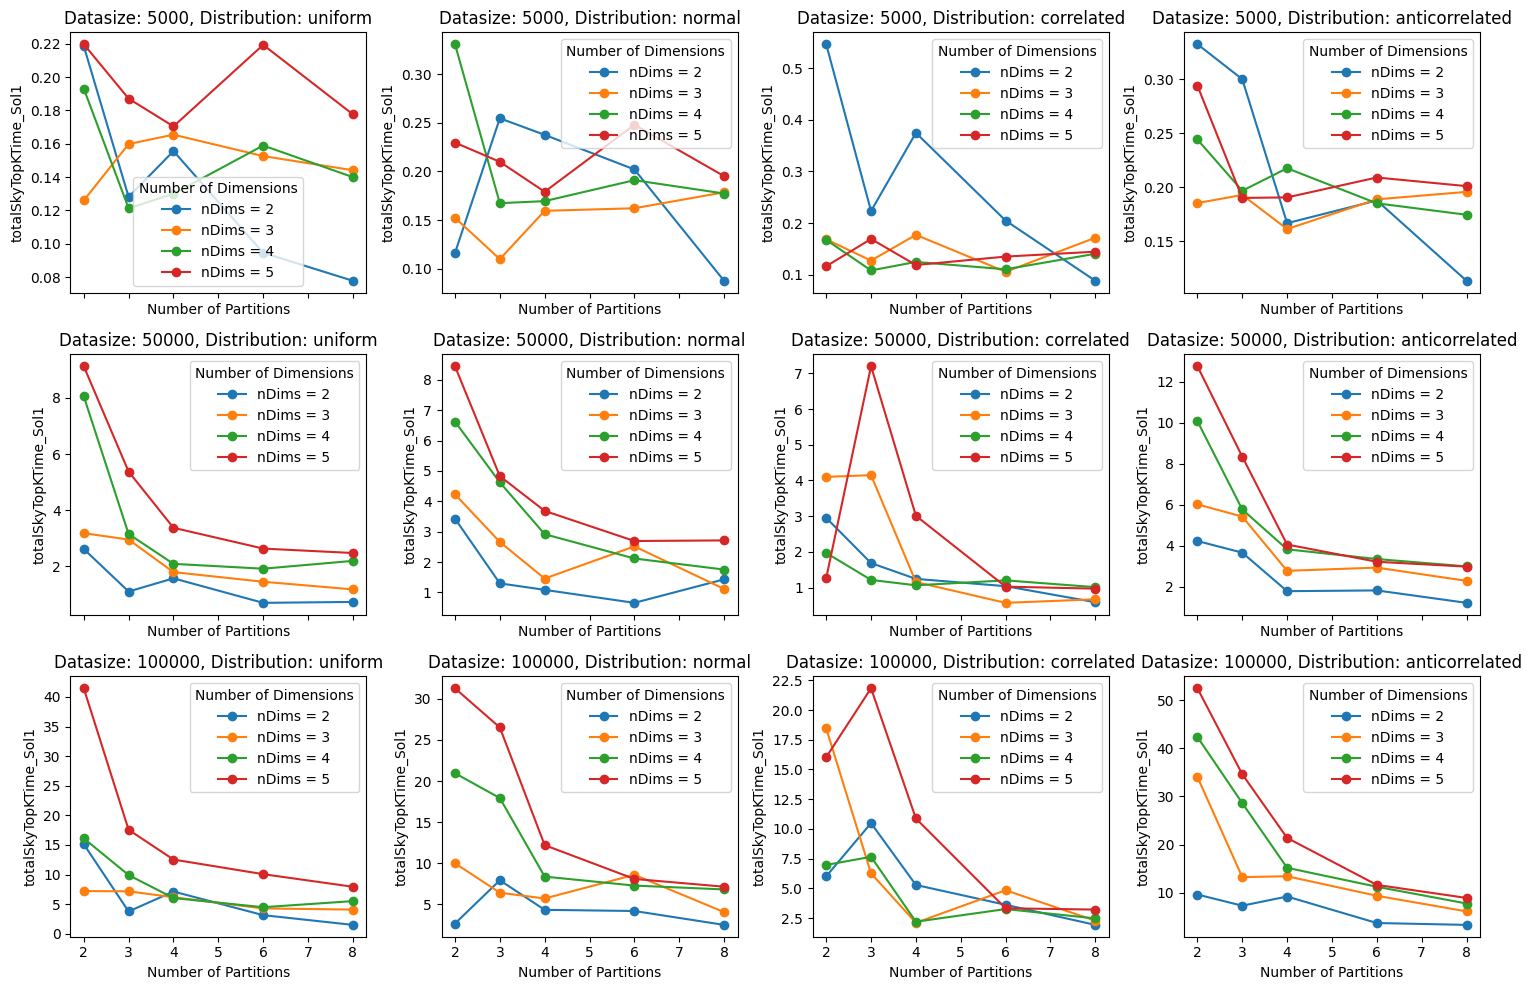

In [17]:
make_plots(SKY_TOPK_S1, False)

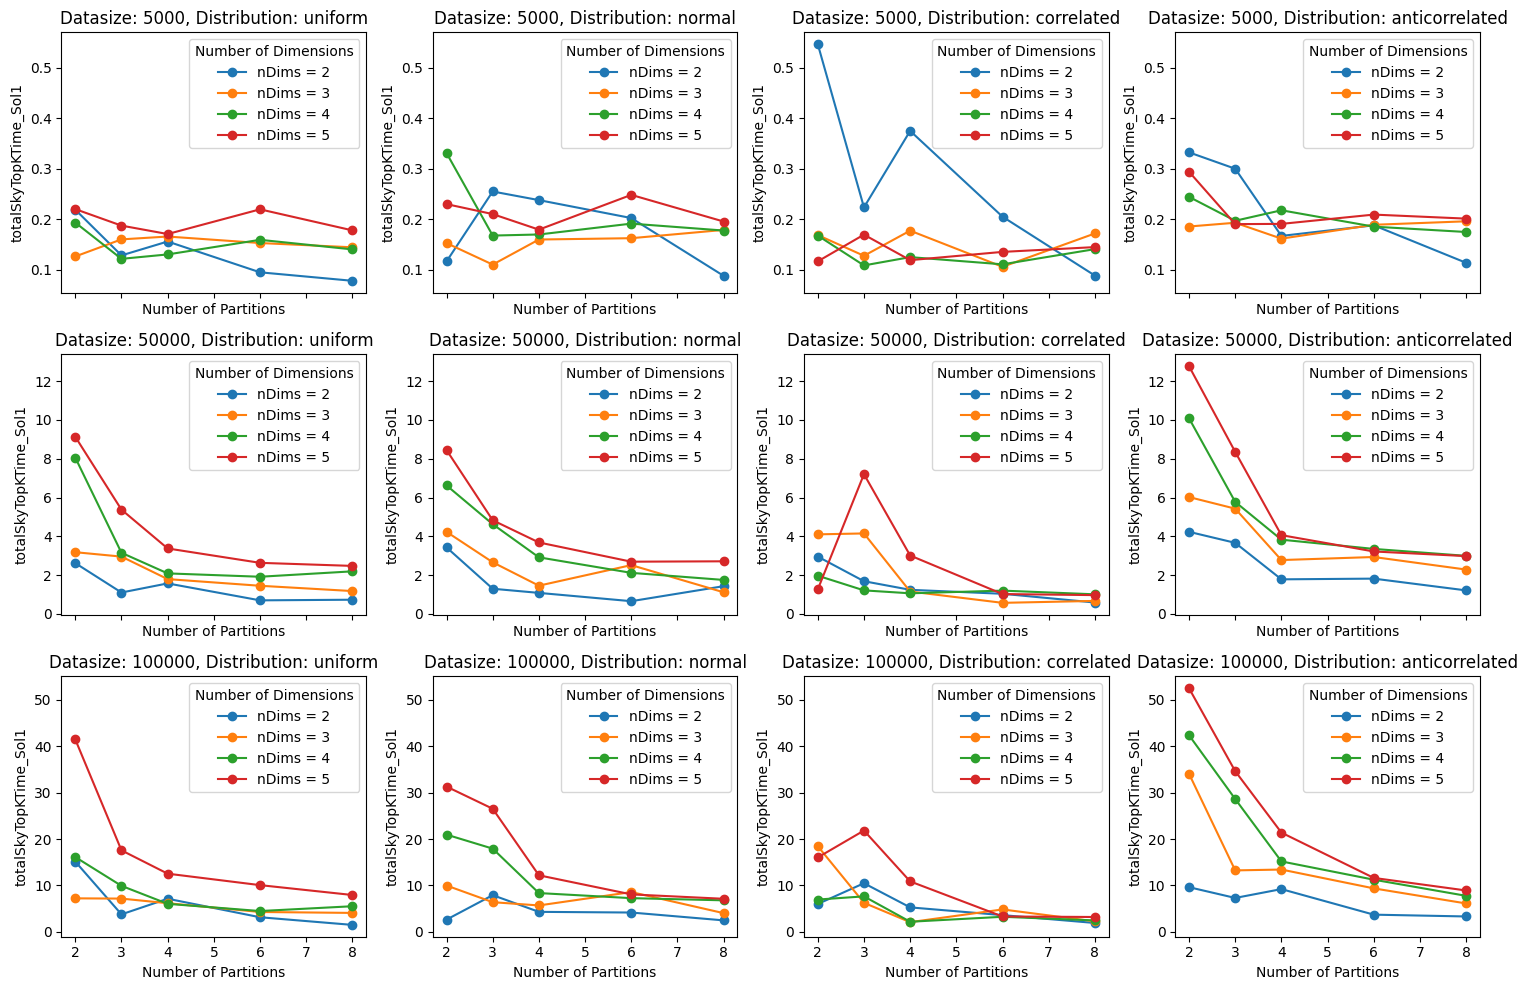

In [18]:
make_plots(SKY_TOPK_S1, True)

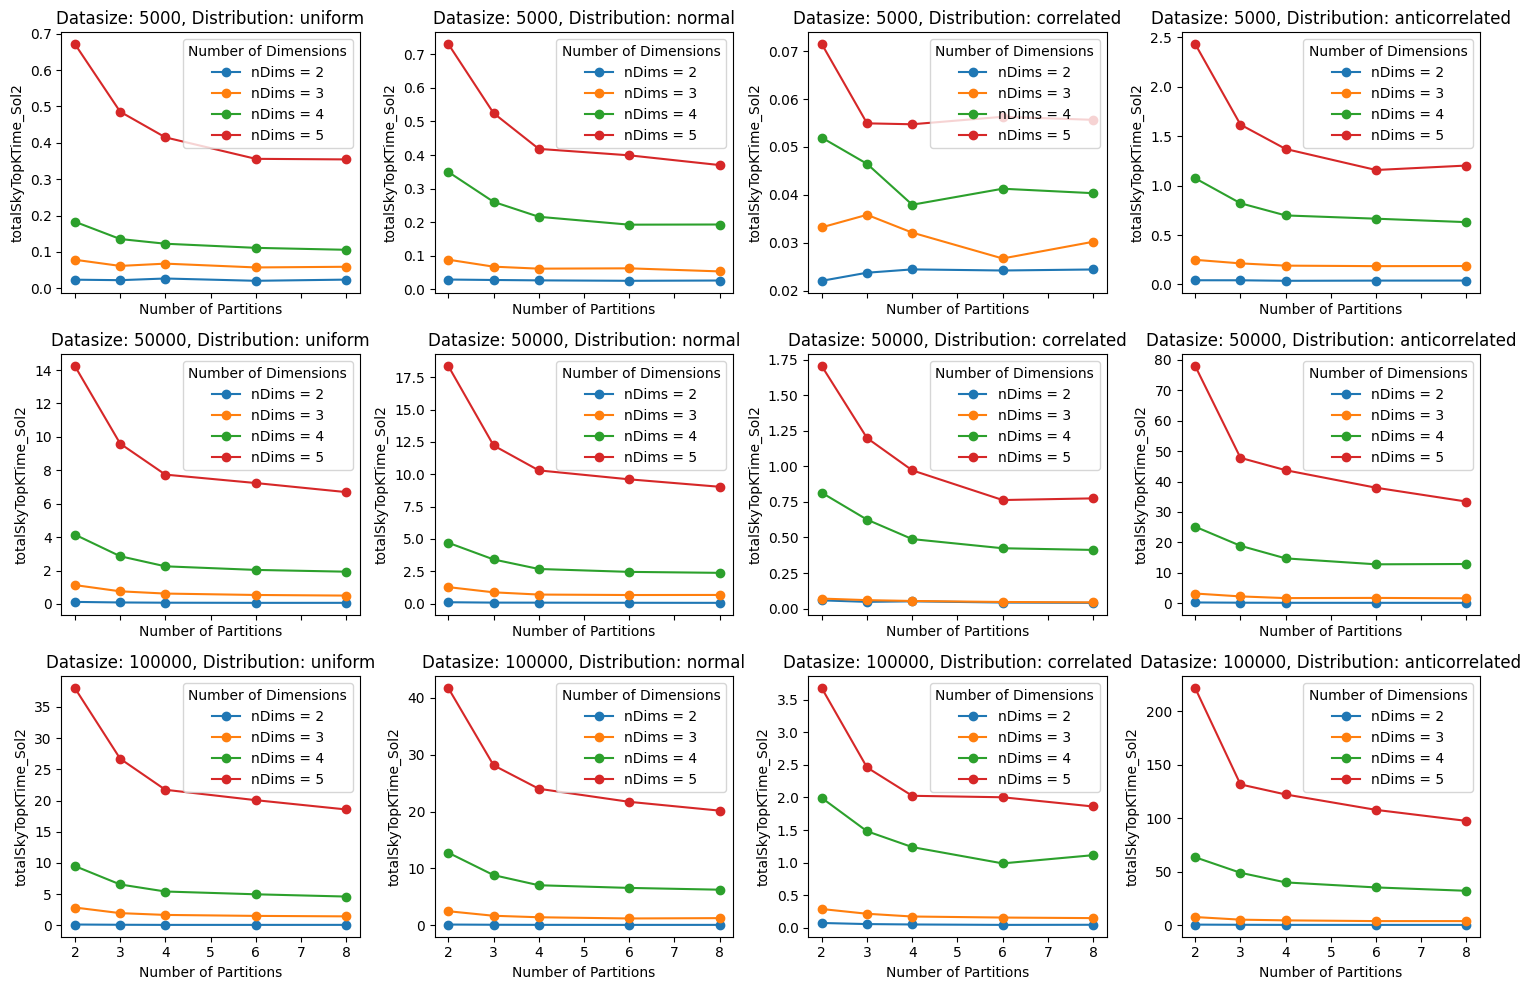

In [19]:
make_plots(SKY_TOPK_S2, False)

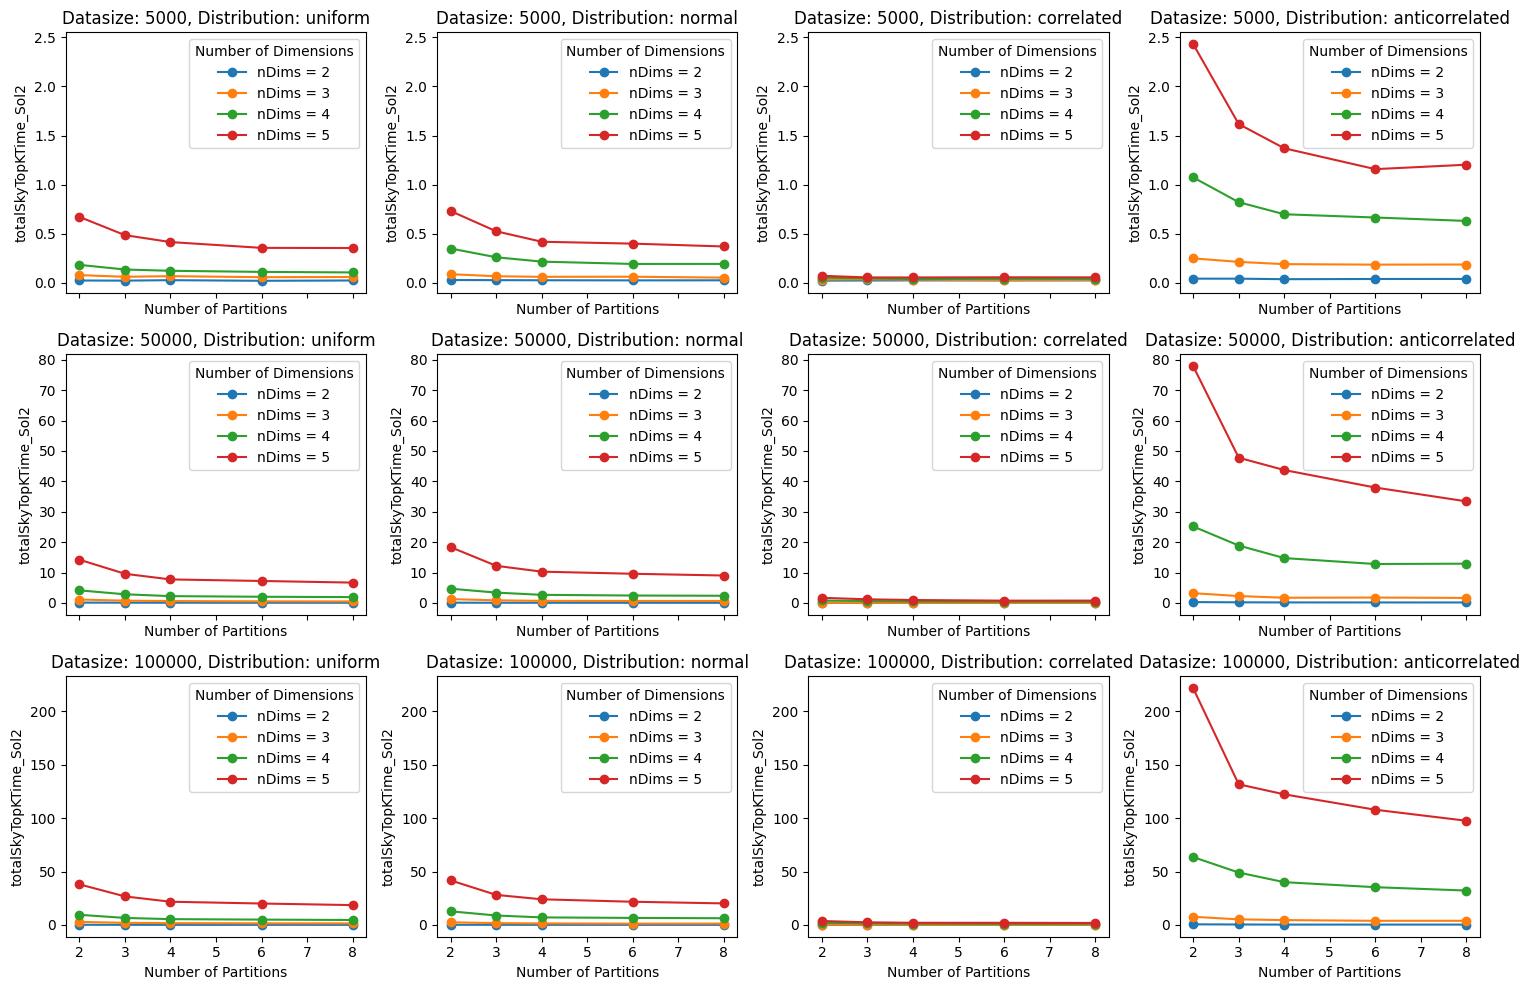

In [20]:
make_plots(SKY_TOPK_S2, True)

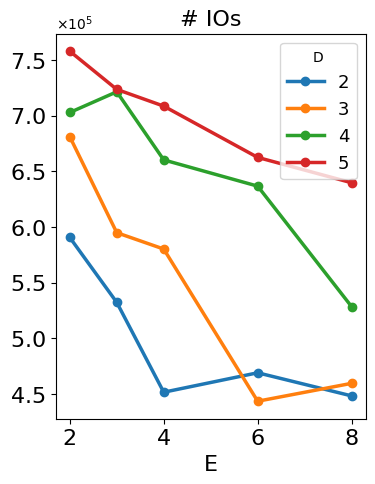

In [21]:
uni100IOS = df[(df[DISTRO]==UNIFORM) & (df[DATA_SIZE]==100000)]
uni100IOS = uni100IOS[[N_DIMS, N_PARTS, IOs, OVERFLOW]]

from matplotlib.ticker import ScalarFormatter

fig, ax = plt.subplots(figsize=(4, 5))

# Create a line plot for each unique nDims value
for nDims, group_df in uni100IOS.groupby(N_DIMS):
    ax.plot(group_df[N_PARTS], group_df[IOs], marker='o', label=f'{nDims}',linewidth=2.5)

ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.yaxis.major.formatter.set_powerlimits((0, 0))


# Set labels and title
ax.set_xlabel('E', fontsize=16)
plt.title('# IOs', fontsize=16)
ax.tick_params(axis='both', labelsize=16)

# Add a legend
ax.legend(title='D', fontsize=13)

plt.savefig('create tree uniform 100k IOS.png', dpi=330, bbox_inches='tight')

# Show the plot
plt.show()

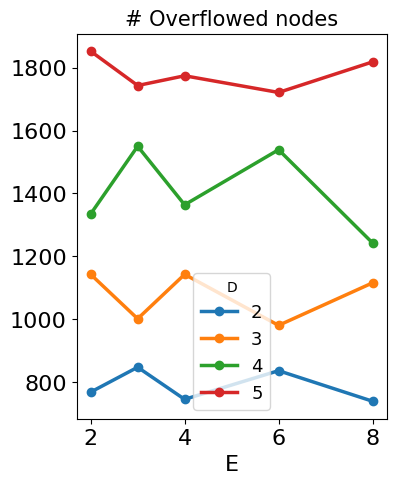

In [22]:
fig, ax = plt.subplots(figsize=(4, 5))

# Create a line plot for each unique nDims value
for nDims, group_df in uni100IOS.groupby(N_DIMS):
    ax.plot(group_df[N_PARTS], group_df[OVERFLOW], marker='o', label=f'{nDims}',linewidth=2.5)

# Set labels and title
ax.set_xlabel('E', fontsize=16)
plt.title('# Overflowed nodes', fontsize=15)

# Add a legend
ax.legend(title='D', fontsize=13)
ax.tick_params(axis='both', labelsize=16)

plt.savefig('create tree uniform 100k Overflow.png', dpi=330, bbox_inches='tight')

# Show the plot
plt.show()

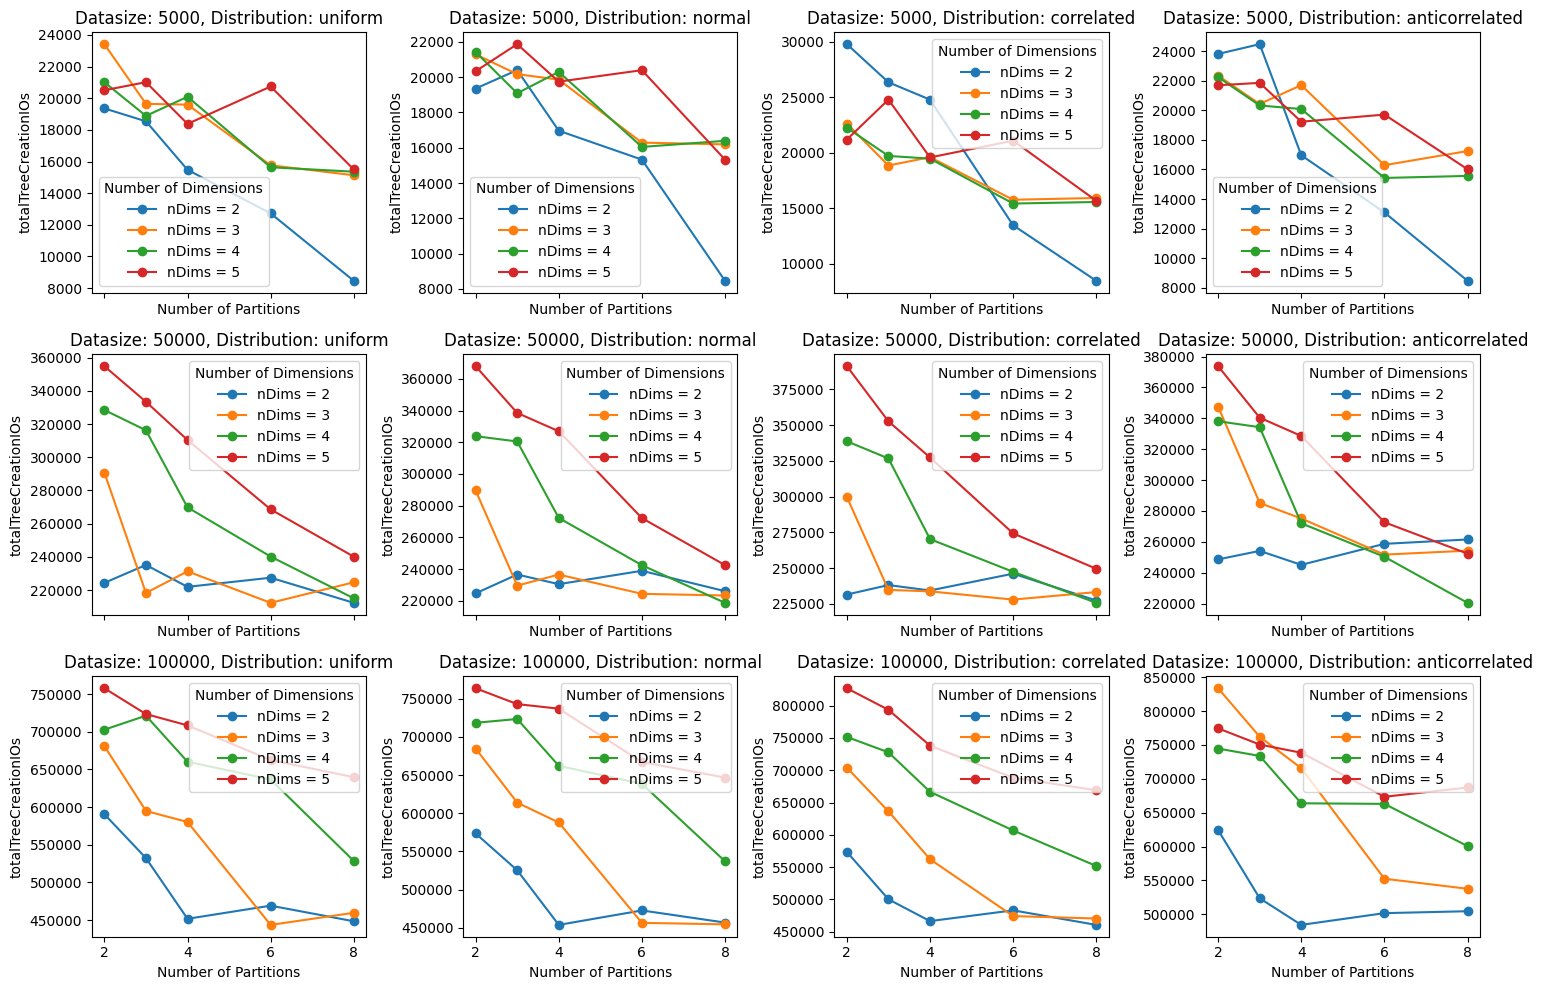

In [23]:
make_plots(IOs, False)

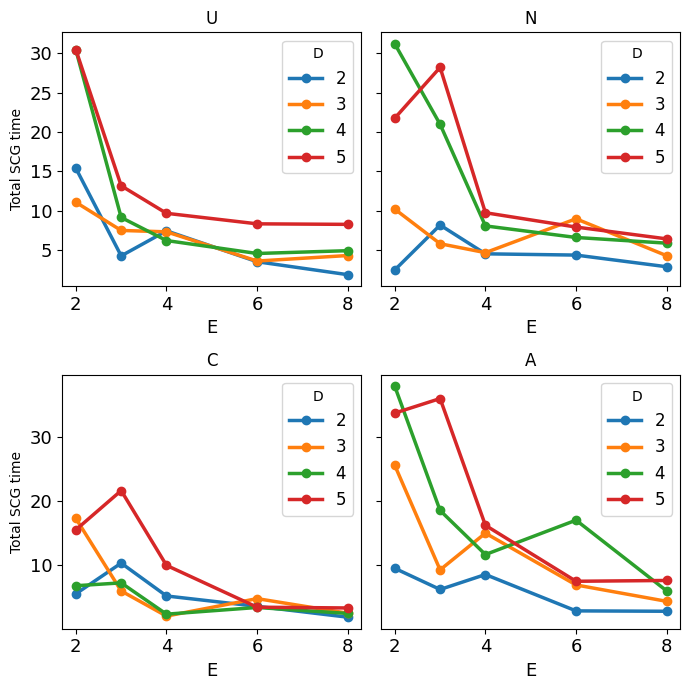

In [79]:
def make_plots_sharex_topk():
    timer_ = TOPK
    # Create a grid of subplots
    fig, axs = plt.subplots(2, 2, figsize=(7,7),  sharey='row')

    # Iterate over all combinations of distribution and dimensions
    for i, distribution in enumerate(DISTRIBUTIONS):
        results_group_ = getDatasetResults(distribution, 100000)
        df_ = results_group_[[N_DIMS, N_PARTS, timer_]]

        # Plotting in the corresponding subplot
        for key, group in df_.groupby(N_DIMS):
            axs[i // 2, i % 2].plot(group[N_PARTS], group[timer_], marker='o', label=f'{key}',linewidth=2.5)

        axs[i // 2, i % 2].set_xlabel('E', fontsize=13)
        if(i%2 == 0):
            axs[i // 2, i % 2].set_ylabel("Total SCG time")
        axs[i // 2, i % 2].set_title(f'{distribution.upper()[0]}')
        axs[i // 2, i % 2].legend(title='D', fontsize=12)
        axs[i // 2, i % 2].tick_params(axis='both', labelsize=13)

    # Adjust layout to prevent clipping of titles
    plt.tight_layout()

    plt.savefig('topk.png', dpi=330, bbox_inches='tight')
    # Show the plot
    plt.show()
make_plots_sharex_topk()

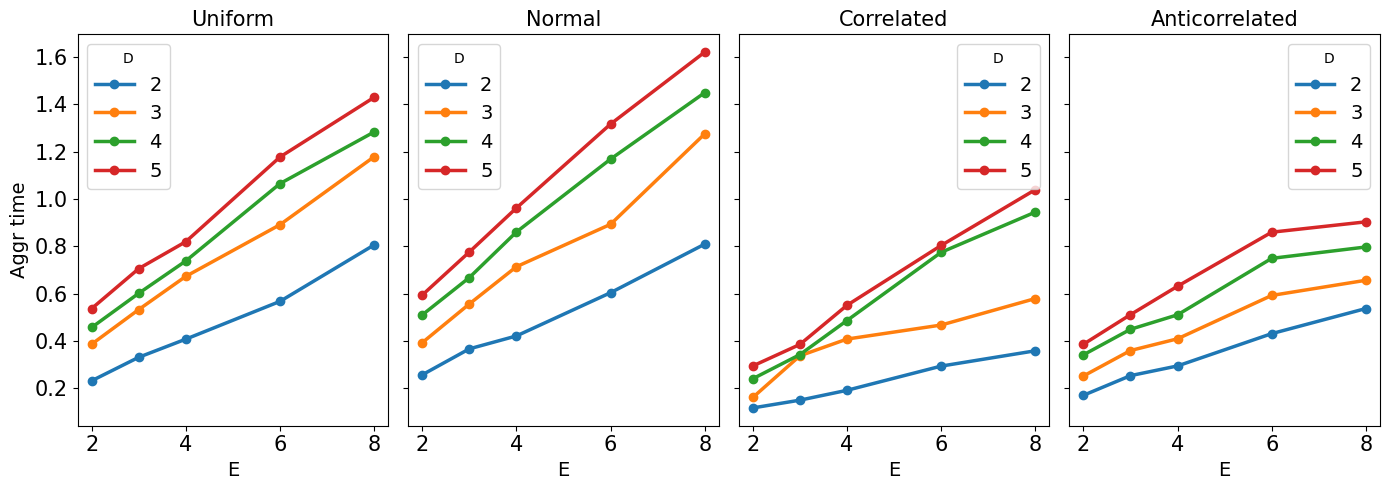

In [102]:
def make_plots_sharex_topk2():
    timer_ = "aggrTopKTime"
    # Create a grid of subplots with 1 row and 4 columns
    fig, axs = plt.subplots(1, 4, figsize=(14, 5), sharey=True)

    # Iterate over all combinations of distribution and dimensions
    for i, distribution in enumerate(DISTRIBUTIONS):
        results_group_ = getDatasetResults(distribution, 100000)
        df_ = results_group_[[N_DIMS, N_PARTS, timer_]]

        # Plotting in the corresponding subplot
        for key, group in df_.groupby(N_DIMS):
            axs[i].plot(group[N_PARTS], group[timer_], marker='o', label=f'{key}', linewidth=2.5)

        axs[i].set_xlabel('E', fontsize=14)
        axs[i].set_title(f'{distribution.upper()[0] + distribution[1:]}', fontsize=15)
        axs[i].legend(title='D', fontsize=14)
        axs[i].tick_params(axis='both', labelsize=15)

    # Set common y-axis label
    axs[0].set_ylabel("Aggr time", fontsize=14)

    # Adjust layout to prevent clipping of titles
    plt.tight_layout()

    plt.savefig('topk aggr.png', dpi=330, bbox_inches='tight')
    # Show the plot
    plt.show()

make_plots_sharex_topk2()


In [30]:

def createPivotTable(timer_, round_=True, isInt=False):

    df_copy = df.copy()
    
    df_copy = df_copy[df_copy[N_DIMS].isin([2, 3, 4, 5])]
    df_copy = df_copy[df_copy[N_PARTS].isin([2, 3, 4, 6, 8])]
    
    if round_:
        df_copy[timer_] = df_copy[timer_].round(2)
    if isInt:
        df_copy[timer_] = df_copy[timer_].astype(int)
        
    pivot_df = df_copy.pivot_table(index=[DISTRO, N_PARTS], columns=[DATA_SIZE, N_DIMS], values=timer_)

    f = '{:.2f}' if not isInt else '{:d}'
    pivot_df = pivot_df.applymap(lambda x: f.format(x) if pd.notna(x) else '')

    pivot_df.to_excel("output.xlsx", engine="openpyxl")
    return pivot_df


In [25]:
createPivotTable(CREATE_TREE)

dataSize                   5000         50000          100000        
nDims                           2     4      2      4       2       4
distribution   nPartitions                                           
uniform        2             1.32  1.37  37.45  39.64  116.12  172.45
               4             0.70  0.88   8.71  11.68   37.07   36.07
               8             0.36  0.65   5.06   6.65   13.68   16.83
normal         2             1.22  1.51  34.31  39.12  111.15  158.83
               4             0.83  0.92   8.31  12.85   32.31   38.16
               8             0.43  0.68   5.76   6.52   13.69   23.48
correlated     2             2.01  1.51  38.02  40.50  112.22  179.14
               4             1.19  0.88   9.15  12.20   53.16   35.93
               8             0.40  0.67   5.01   6.32   12.54   19.40
anticorrelated 2             1.54  1.44  41.53  40.19  118.95  172.92
               4             0.75  0.93  10.37  10.97   44.63   36.44
               8             0.48  0.67   5.99   6.44   16.64   18.70

In [26]:
createPivotTable(IOs, round_=False, isInt=True)

dataSize                   5000           50000           100000        
nDims                           2      4       2       4       2       4
distribution   nPartitions                                              
uniform        2            19354  21009  224386  328472  590655  702877
               4            15476  20091  221975  269847  451724  660308
               8             8464  15357  212353  215064  448426  528555
normal         2            19354  21423  224758  323821  573566  718309
               4            16964  20298  230555  272308  453956  662053
               8             8464  16392  226123  218778  456997  537160
correlated     2            29779  22251  231442  338643  573426  751599
               4            24782  19470  234269  270230  466247  666628
               8             8464  15564  227257  225639  460378  551607
anticorrelated 2            23821  22251  248587  338127  624321  744624
               4            16964  20091  245057  271960  484484  663879
               8             8464  15564  261493  220428  504646  600750

In [27]:
createPivotTable(OVERFLOW, round_=False, isInt=True)

dataSize                   5000       50000       100000      
nDims                           2   4      2    4      2     4
distribution   nPartitions                                    
uniform        2               30  63    373  676    769  1335
               4               22  61    362  657    746  1364
               8                8  43    339  600    740  1243
normal         2               30  65    374  647    720  1375
               4               26  62    393  664    752  1357
               8                8  48    378  614    768  1296
correlated     2               61  69    388  709    766  1487
               4               49  58    401  660    790  1382
               8                8  44    387  657    788  1379
anticorrelated 2               43  69    445  707    853  1474
               4               26  61    430  670    842  1369
               8                8  44    483  620    907  1461

In [103]:
total = createPivotTable(CREATE_TREE)
total

dataSize                   5000                     50000                        100000                        
nDims                           2     3     4     5      2      3      4      5       2       3       4       5
distribution   nPartitions                                                                                     
uniform        2             1.32  1.42  1.37  1.40  37.45  35.66  39.64  49.55  116.12  174.82  172.45  144.26
               3             0.88  0.99  0.96  1.11  15.94  23.14  19.59  22.26   67.39   50.55   79.88   72.15
               4             0.70  0.89  0.88  0.85   8.71  13.20  11.68  11.48   37.07   46.42   36.07   59.98
               6             0.50  0.66  0.68  0.85   6.24   6.41   9.58   8.28   19.21   23.81   22.06   26.18
               8             0.36  0.65  0.65  0.66   5.06   5.94   6.65   8.16   13.68   22.22   16.83   21.96
normal         2             1.22  1.38  1.51  1.39  34.31  32.45  39.12  51.38  111.15  162.49  158.83  149.87
               3             1.12  1.00  0.99  1.18  15.90  23.54  21.22  26.67   67.48   46.47   97.97   98.47
               4             0.83  0.91  0.92  0.87   8.31  14.03  12.85  14.91   32.31   38.50   38.16   52.26
               6             0.69  0.71  0.69  0.85   7.06   9.65   9.44   9.48   21.87   32.09   29.28   29.28
               8             0.43  0.68  0.68  0.61   5.76   5.83   6.52   7.74   13.69   20.08   23.48   20.19
correlated     2             2.01  1.49  1.51  1.43  38.02  33.86  40.50  55.21  112.22  178.53  179.14  144.72
               3             1.28  0.93  0.98  1.24  15.53  23.35  18.94  27.96   79.33   48.74   91.10  117.76
               4             1.19  0.89  0.88  0.84   9.15  10.98  12.20  18.68   53.16   27.25   35.93   59.78
               6             0.72  0.64  0.66  0.84   6.81   6.56   9.52   8.28   23.14   35.02   19.39   29.79
               8             0.40  0.65  0.67  0.65   5.01   5.69   6.32   7.67   12.54   19.02   19.40   23.98
anticorrelated 2             1.54  1.35  1.44  1.56  41.53  34.07  40.19  55.30  118.95  189.15  172.92  123.88
               3             1.19  1.00  1.04  1.12  15.70  20.49  19.43  23.12   62.74   77.43   87.98  116.82
               4             0.75  0.92  0.93  0.86  10.37  12.34  10.97  14.70   44.63   44.19   36.44   80.06
               6             0.69  0.69  0.68  0.79   7.45   8.03  10.51   8.67   21.95   29.09   25.04   27.58
               8             0.48  0.69  0.67  0.67   5.99   6.94   6.44   7.40   16.64   21.97   18.70   21.84

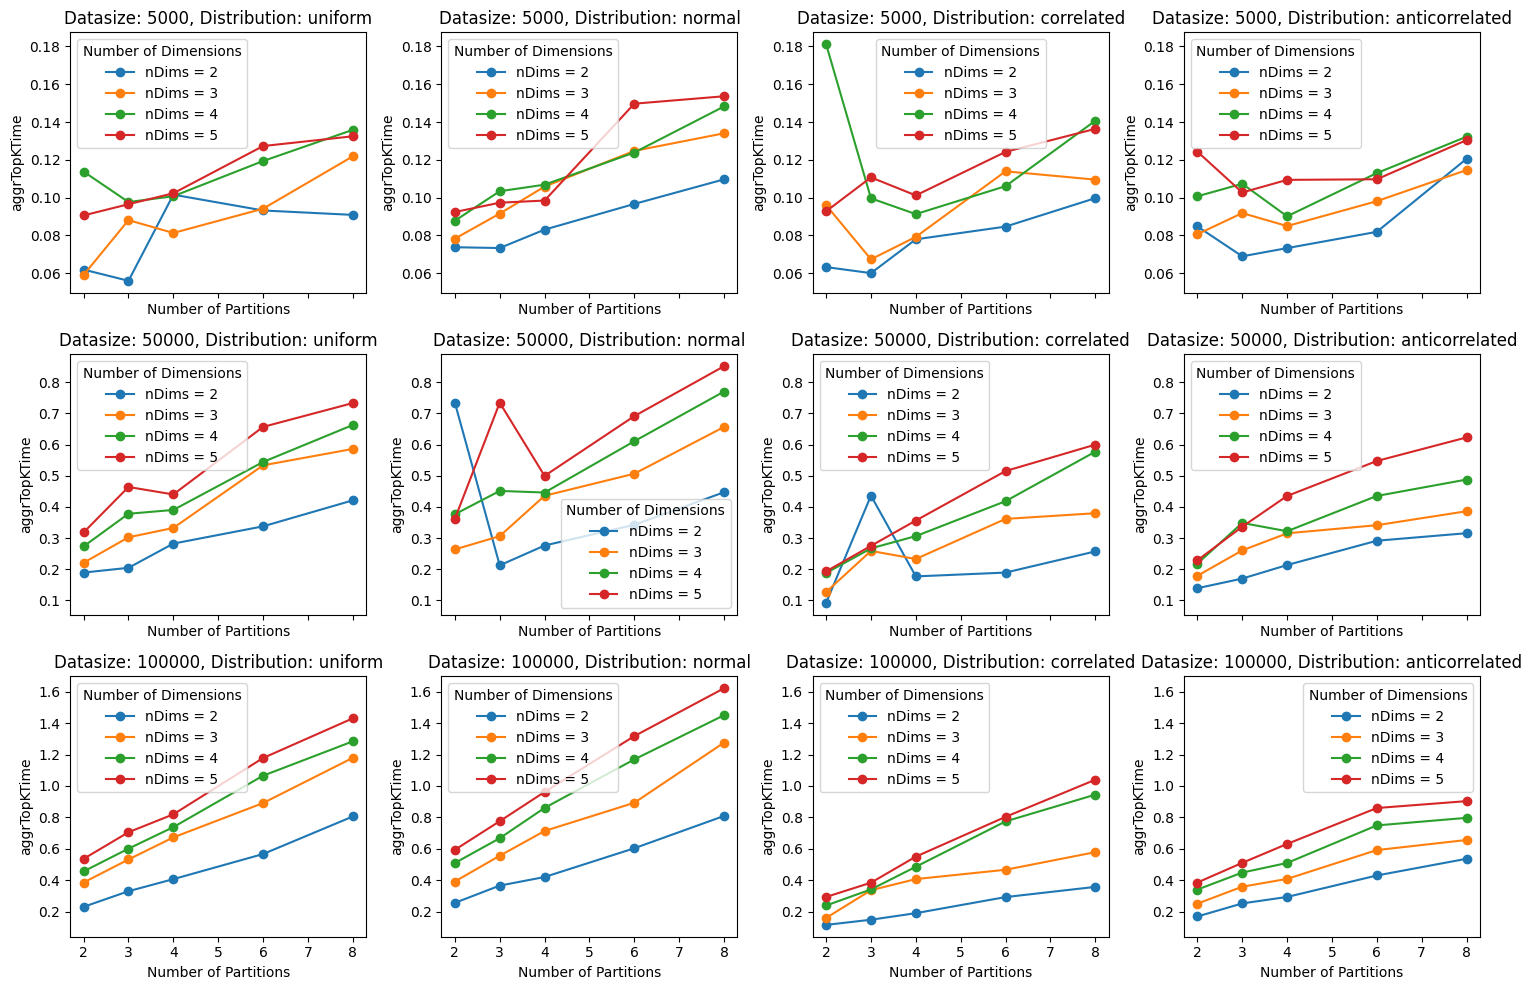

dataSize                   5000                     50000                    100000                  
nDims                           2     3     4     5      2     3     4     5      2     3     4     5
distribution   nPartitions                                                                           
uniform        2             0.06  0.06  0.11  0.09   0.19  0.22  0.27  0.32   0.23  0.39  0.46  0.54
               3             0.06  0.09  0.10  0.10   0.20  0.30  0.38  0.46   0.33  0.53  0.60  0.71
               4             0.10  0.08  0.10  0.10   0.28  0.33  0.39  0.44   0.41  0.67  0.74  0.82
               6             0.09  0.09  0.12  0.13   0.34  0.53  0.54  0.66   0.57  0.89  1.07  1.18
               8             0.09  0.12  0.14  0.13   0.42  0.59  0.66  0.73   0.81  1.18  1.28  1.43
normal         2             0.07  0.08  0.09  0.09   0.73  0.26  0.38  0.36   0.26  0.39  0.51  0.59
               3             0.07  0.09  0.10  0.10   0.21  0.31  0.45  0.73   0.37  0.56  0.67  0.78
               4             0.08  0.11  0.11  0.10   0.28  0.44  0.45  0.50   0.42  0.71  0.86  0.96
               6             0.10  0.12  0.12  0.15   0.34  0.51  0.61  0.69   0.60  0.89  1.17  1.32
               8             0.11  0.13  0.15  0.15   0.45  0.66  0.77  0.85   0.81  1.28  1.45  1.62
correlated     2             0.06  0.10  0.18  0.09   0.09  0.13  0.19  0.19   0.12  0.16  0.24  0.30
               3             0.06  0.07  0.10  0.11   0.44  0.26  0.27  0.28   0.15  0.34  0.34  0.39
               4             0.08  0.08  0.09  0.10   0.18  0.23  0.31  0.36   0.19  0.41  0.49  0.55
               6             0.08  0.11  0.11  0.12   0.19  0.36  0.42  0.52   0.29  0.47  0.78  0.80
               8             0.10  0.11  0.14  0.14   0.26  0.38  0.58  0.60   0.36  0.58  0.94  1.04
anticorrelated 2             0.08  0.08  0.10  0.12   0.14  0.18  0.22  0.23   0.17  0.25  0.34  0.39
               3             0.07  0.09  0.11  0.10   0.17  0.26  0.35  0.34   0.25  0.36  0.45  0.51
               4             0.07  0.08  0.09  0.11   0.21  0.32  0.32  0.44   0.30  0.41  0.51  0.63
               6             0.08  0.10  0.11  0.11   0.29  0.34  0.44  0.55   0.43  0.59  0.75  0.86
               8             0.12  0.11  0.13  0.13   0.32  0.39  0.49  0.62   0.54  0.66  0.80  0.90

In [99]:
aggr = createPivotTable("aggrTopKTime")
aggr

In [98]:
total = total.apply(pd.to_numeric, errors='coerce').fillna(0)
aggr = aggr.apply(pd.to_numeric, errors='coerce').fillna(0)

# Calculate the percentage for each corresponding pair of cells
portion = (aggr / total) * 100

portion

dataSize                       5000                                        50000                                       100000                                 
nDims                               2          3          4          5          2          3          4          5          2          3          4          5
distribution   nPartitions                                                                                                                                    
uniform        2            30.000000  54.545455  45.833333  34.615385   7.421875   7.213115   3.465982   2.707276   1.492537   3.519856   1.511666   1.773399
               3            46.153846  47.368421  71.428571  58.823529  14.814815   8.130081  12.418301   9.829060   7.728337   7.057257   6.557377   5.386950
               4            47.619048  42.105263  71.428571  58.823529  15.730337  20.496894  19.696970  14.102564   5.503356   9.140518  11.897106   8.471074
               6            69.230769  60.000000  75.000000  59.090909  36.170213  39.552239  29.508197  25.984252  16.147309  24.585635  23.362445  14.131737
               8            75.000000  75.000000  77.777778  72.222222  46.153846  49.166667  34.020619  28.853755  42.857143  27.314815  25.963489  17.270531
normal         2            77.777778  53.333333  29.032258  45.000000  19.010417   5.816555   7.279693   5.034965  10.441767   3.819785   1.634092   2.710152
               3            25.000000  64.285714  55.555556  50.000000  14.685315  12.809917   6.578947  18.911917   4.517705   9.621993   3.191996   2.763997
               4            29.629630  68.750000  68.750000  71.428571  22.580645  22.564103  16.791045  16.339869   9.251101  15.170940  10.643564   9.836066
               6            41.666667  63.157895  66.666667  57.692308  35.789474  21.888412  32.275132  28.395062  13.698630   9.899889  17.700454  16.624685
               8            84.615385  59.090909  78.947368  83.333333  30.000000  50.381679  45.562130  30.141844  28.027682  29.767442  24.617997  25.194401
correlated     2            10.714286  52.631579  58.064516  60.000000   3.202847   3.439153  11.176471  14.728682   2.150538   0.922722   3.508772   1.926782
               3            25.000000  63.636364  62.500000  61.111111  22.000000   6.060606  20.300752   3.994294   1.446480   5.647841   4.670330   1.798064
               4            20.000000  44.444444  64.285714  66.666667  13.636364  17.424242  34.065934  12.121212   3.625954  19.523810  20.416667   5.489022
               6            38.095238  68.750000  78.571429  66.666667  17.592593  41.860465  31.578947  46.428571   8.011050   9.751037  22.674419  22.922636
               8            83.333333  47.826087  70.000000  73.684211  35.616438  45.238095  47.933884  48.780488  18.652850  22.834646  37.450199  30.860534
anticorrelated 2            25.806452  53.333333  40.000000  41.379310   3.921569   4.109589   3.873239   2.893082   1.780105   0.975419   0.895680   1.154188
               3            23.333333  52.941176  57.894737  62.500000   4.956268   6.615776   9.186352   3.563941   4.000000   3.866810   2.421959   1.414309
               4            46.666667  50.000000  50.000000  61.111111  12.804878  14.814815  11.428571  14.473684   3.492433   2.724252   4.358974   3.872157
               6            47.058824  58.823529  73.333333  61.111111  18.471338  14.977974  19.909502  22.633745  14.776632   8.477011   4.393673  11.420983
               8            70.588235  55.000000  81.250000  81.250000  29.357798  22.285714  24.873096  27.312775  18.947368  15.000000  13.266998  11.749347